In [1]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cia = pd.read_csv("CIA_Country_Facts.csv")

In [3]:
df_cia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [4]:
df_cia.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df_cia.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [6]:
df_cia.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

<Axes: xlabel='Population', ylabel='Count'>

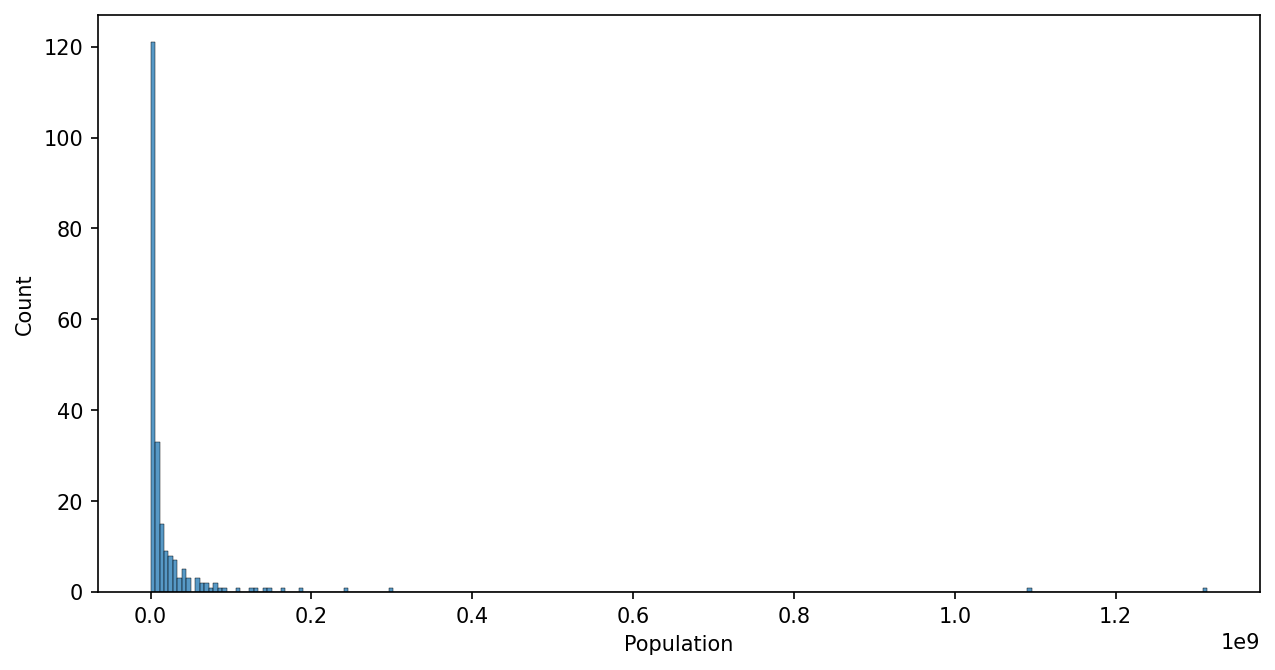

In [7]:
fig = plt.figure(figsize=(10,5), dpi=150)

sns.histplot(x='Population', data=df_cia)

<Axes: xlabel='Population', ylabel='Count'>

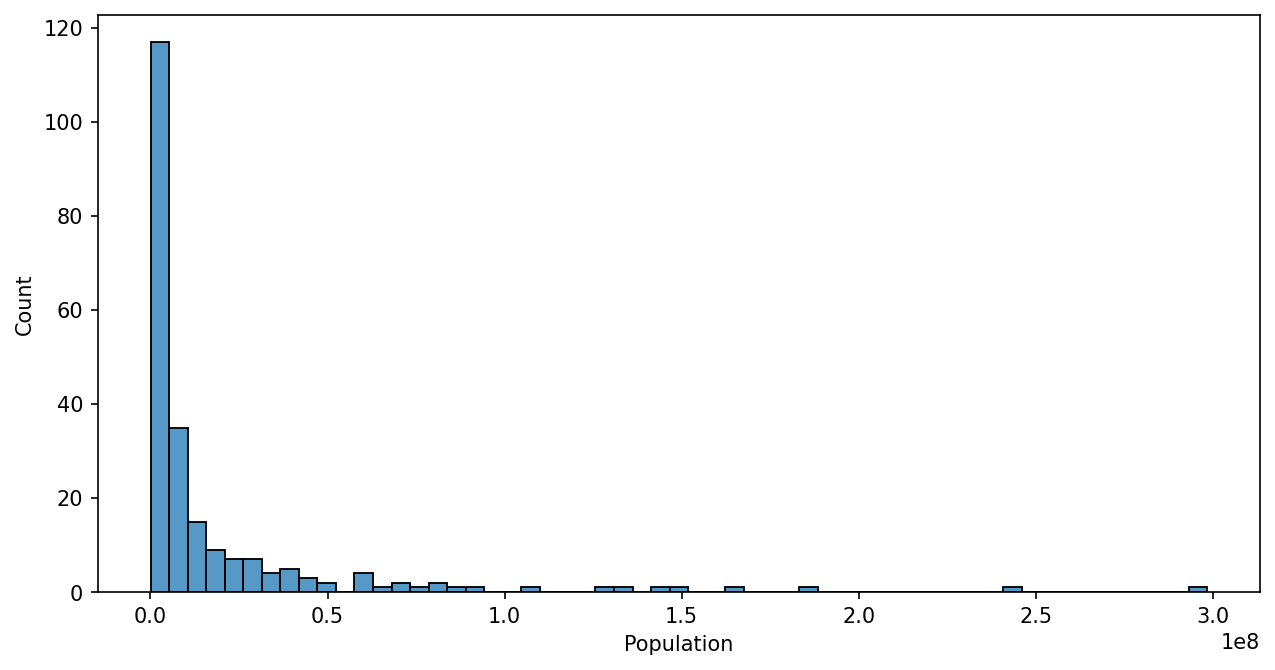

In [8]:
fig = plt.figure(figsize=(10,5), dpi=150)

sns.histplot(data=df_cia[df_cia['Population']<500000000], x='Population')

In [9]:
df_cia['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [10]:
df_cia['GDP ($ per capita)'].nunique()

130

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ASIA (EX. NEAR EAST)         '),
  Text(1, 0, 'EASTERN EUROPE                     '),
  Text(2, 0, 'NORTHERN AFRICA                    '),
  Text(3, 0, 'OCEANIA                            '),
  Text(4, 0, 'WESTERN EUROPE                     '),
  Text(5, 0, 'SUB-SAHARAN AFRICA                 '),
  Text(6, 0, 'LATIN AMER. & CARIB    '),
  Text(7, 0, 'C.W. OF IND. STATES '),
  Text(8, 0, 'NEAR EAST                          '),
  Text(9, 0, 'NORTHERN AMERICA                   '),
  Text(10, 0, 'BALTICS                            ')])

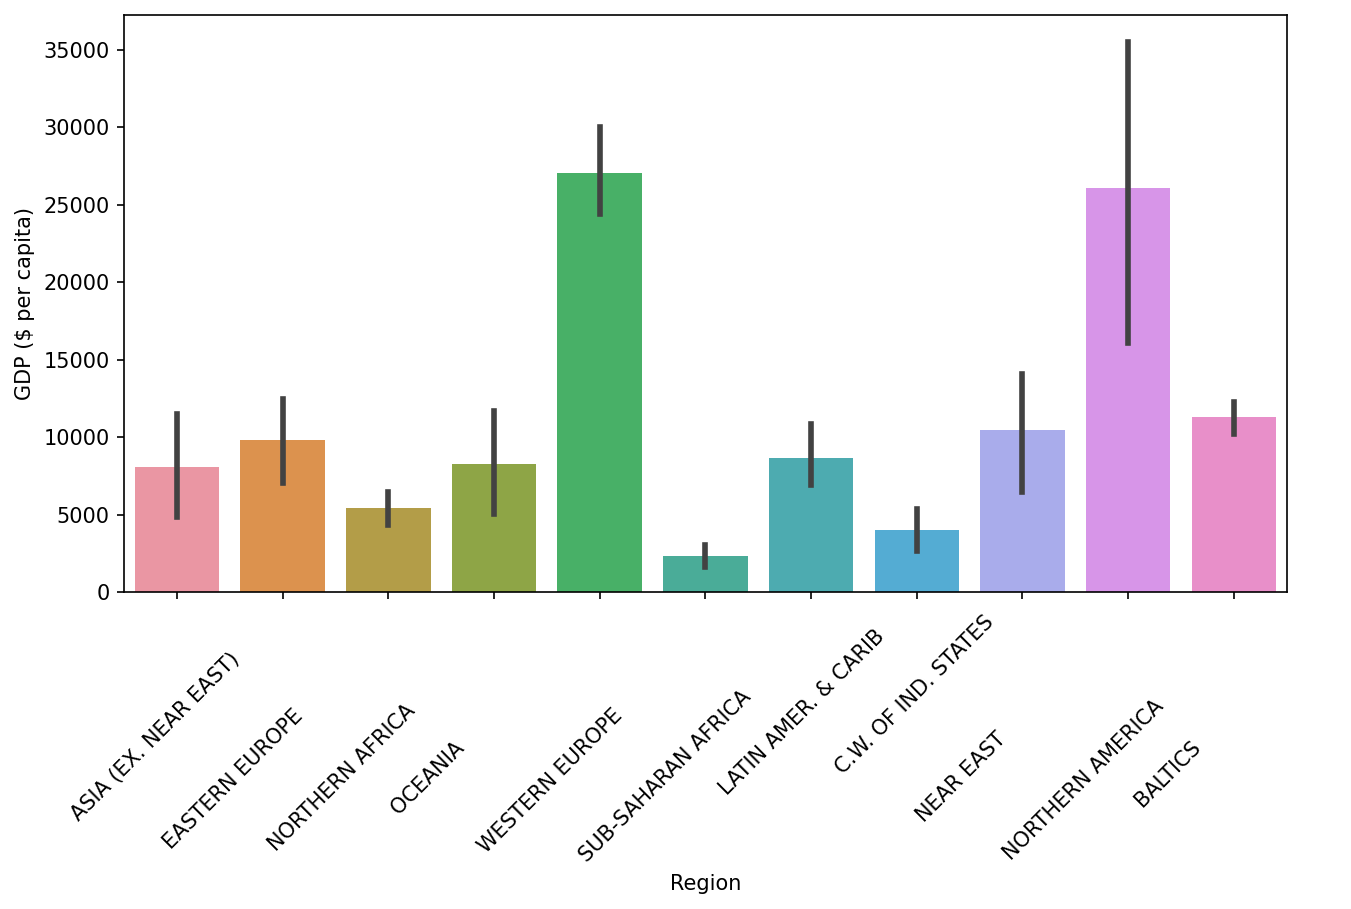

In [11]:
fig = plt.figure(figsize=(10,5), dpi=150)

sns.barplot(data=df_cia, x='Region', y='GDP ($ per capita)', estimator=np.mean)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ASIA (EX. NEAR EAST)         '),
  Text(1, 0, 'EASTERN EUROPE                     '),
  Text(2, 0, 'NORTHERN AFRICA                    '),
  Text(3, 0, 'OCEANIA                            '),
  Text(4, 0, 'WESTERN EUROPE                     '),
  Text(5, 0, 'SUB-SAHARAN AFRICA                 '),
  Text(6, 0, 'LATIN AMER. & CARIB    '),
  Text(7, 0, 'C.W. OF IND. STATES '),
  Text(8, 0, 'NEAR EAST                          '),
  Text(9, 0, 'NORTHERN AMERICA                   '),
  Text(10, 0, 'BALTICS                            ')])

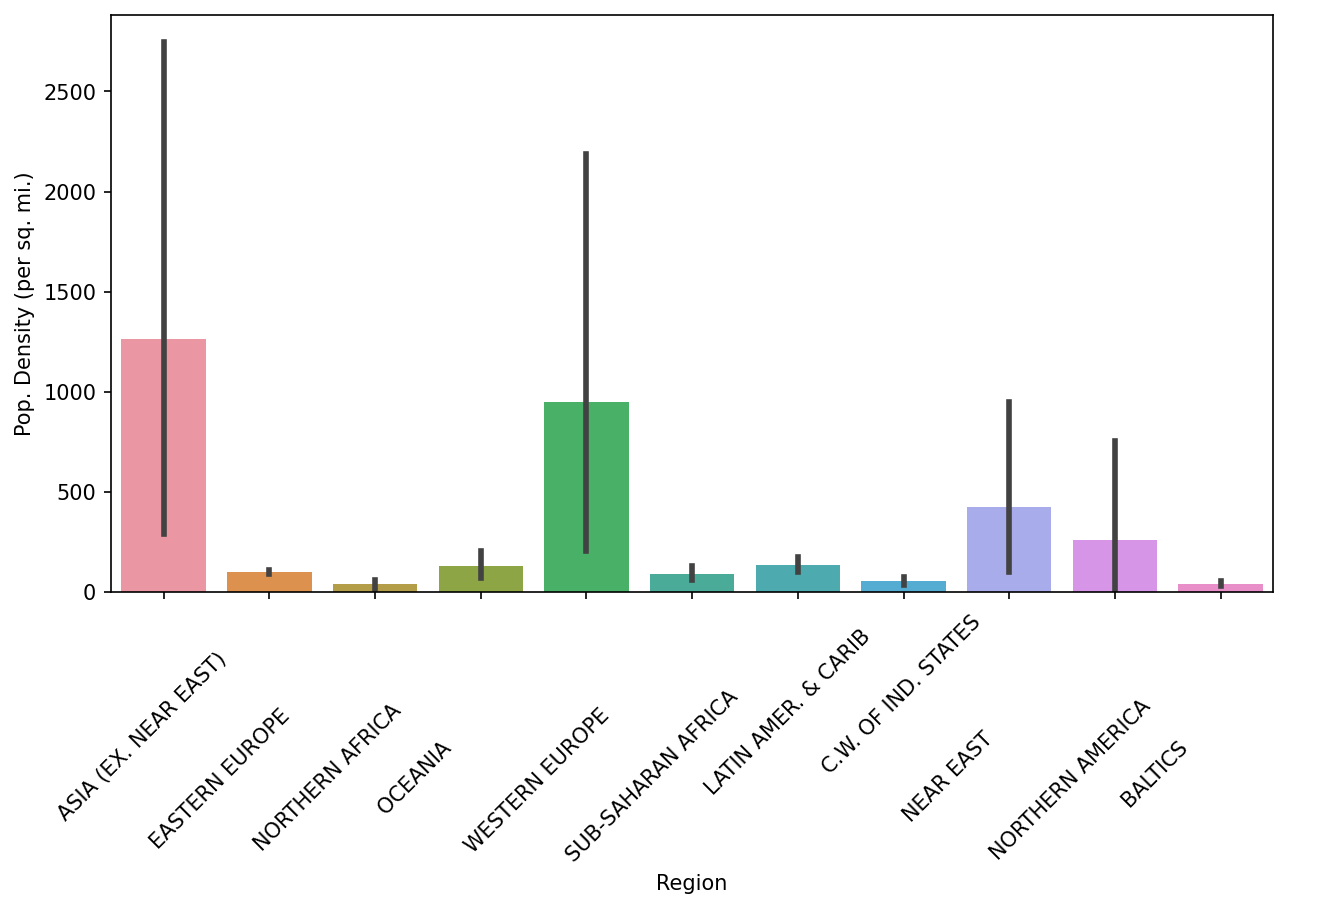

In [12]:
fig = plt.figure(figsize=(10,5), dpi=150)

sns.barplot(data=df_cia, x='Region', y='Pop. Density (per sq. mi.)', estimator=np.mean)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ASIA (EX. NEAR EAST)         '),
  Text(1, 0, 'EASTERN EUROPE                     '),
  Text(2, 0, 'NORTHERN AFRICA                    '),
  Text(3, 0, 'OCEANIA                            '),
  Text(4, 0, 'WESTERN EUROPE                     '),
  Text(5, 0, 'SUB-SAHARAN AFRICA                 '),
  Text(6, 0, 'LATIN AMER. & CARIB    '),
  Text(7, 0, 'C.W. OF IND. STATES '),
  Text(8, 0, 'NEAR EAST                          '),
  Text(9, 0, 'NORTHERN AMERICA                   '),
  Text(10, 0, 'BALTICS                            ')])

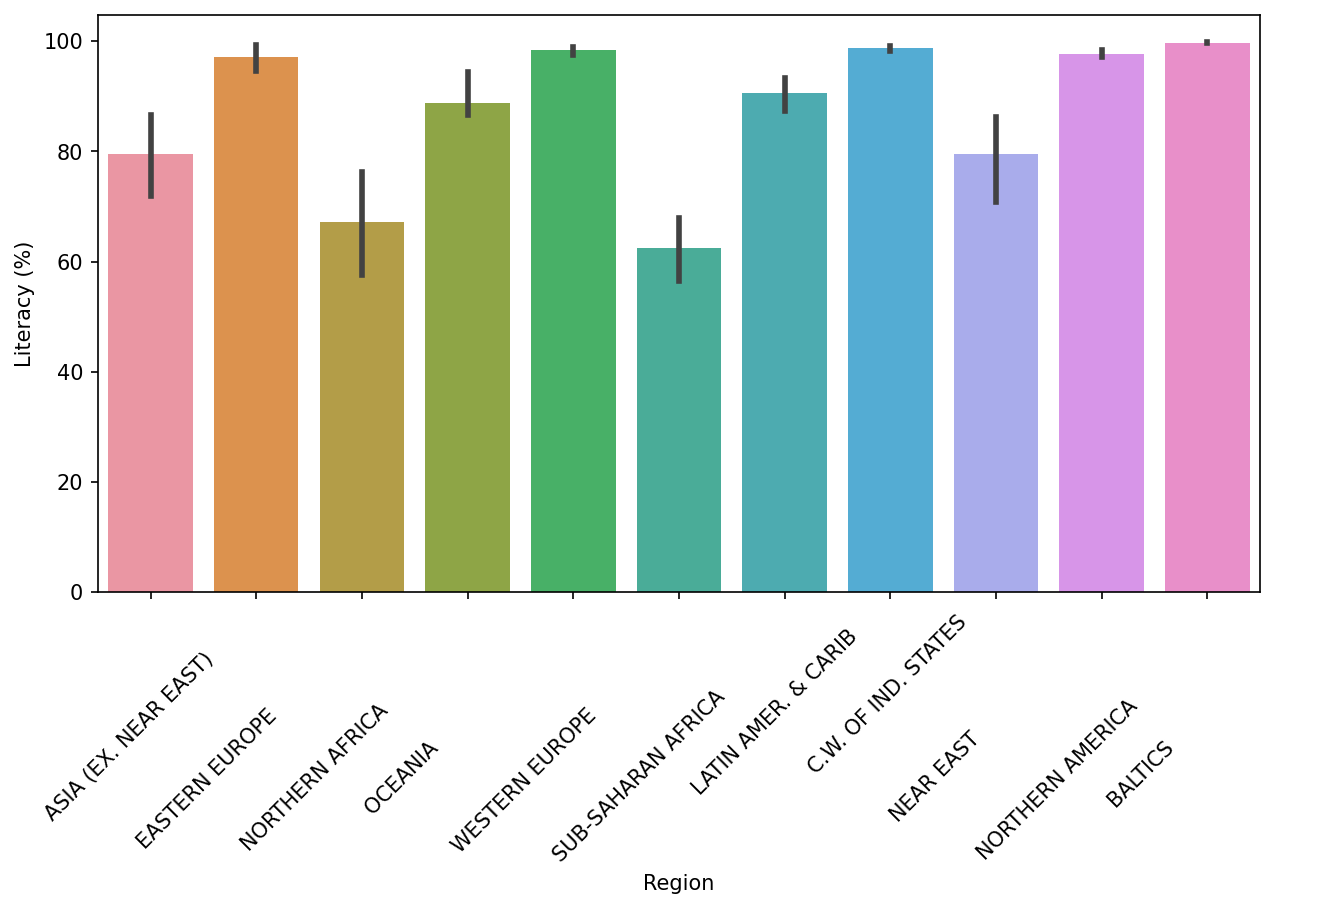

In [13]:
fig = plt.figure(figsize=(10,5), dpi=150)

sns.barplot(data=df_cia, x='Region', y='Literacy (%)', estimator=np.mean)
plt.xticks(rotation=45)

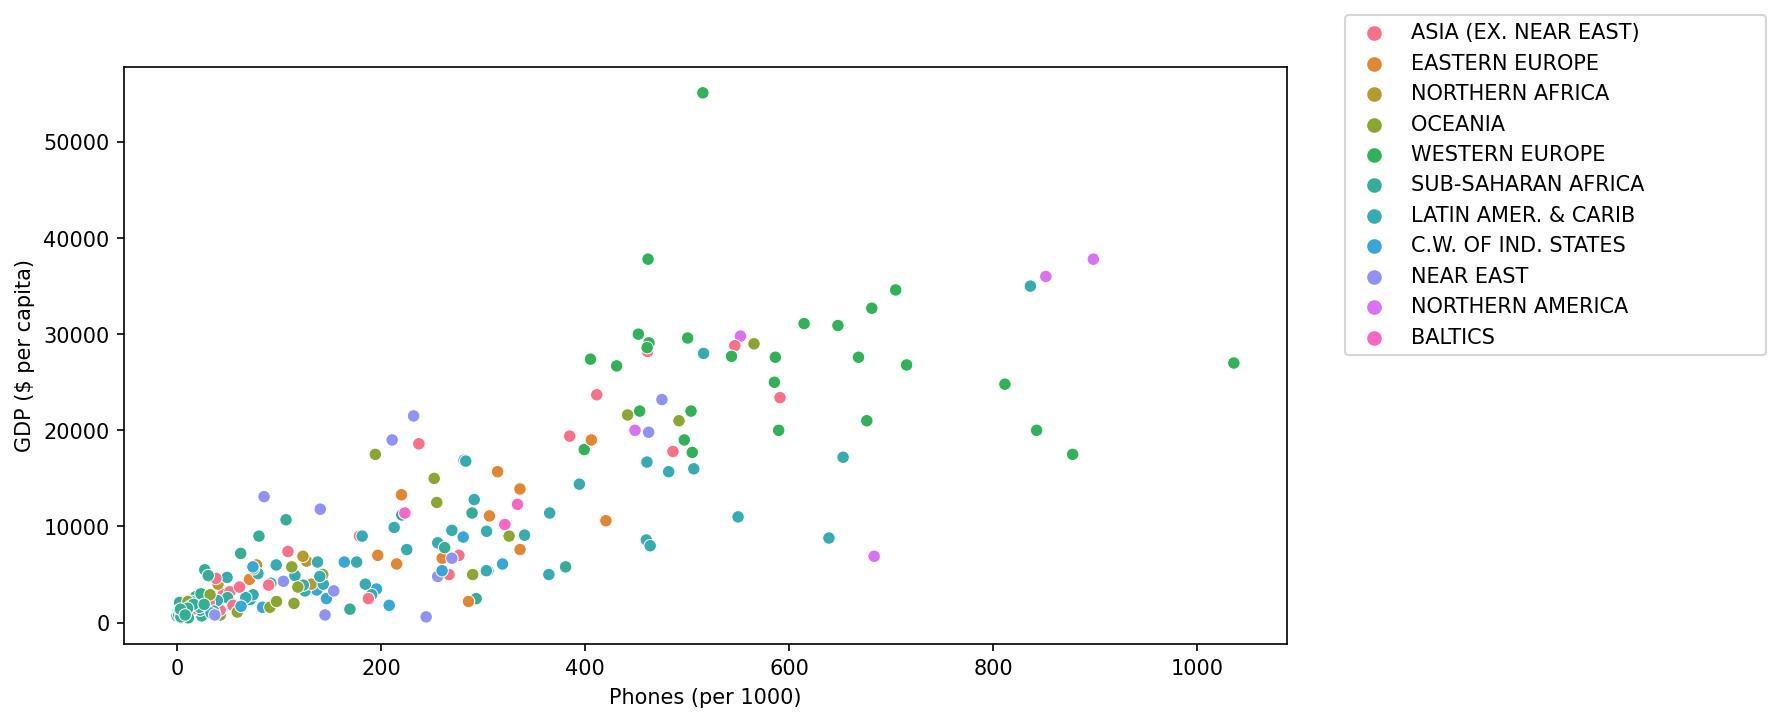

In [14]:
fig = plt.figure(figsize=(10,5), dpi=150)

sns.scatterplot(data=df_cia, x='Phones (per 1000)', y='GDP ($ per capita)', hue='Region')
plt.legend(loc=(1.05,0.5))

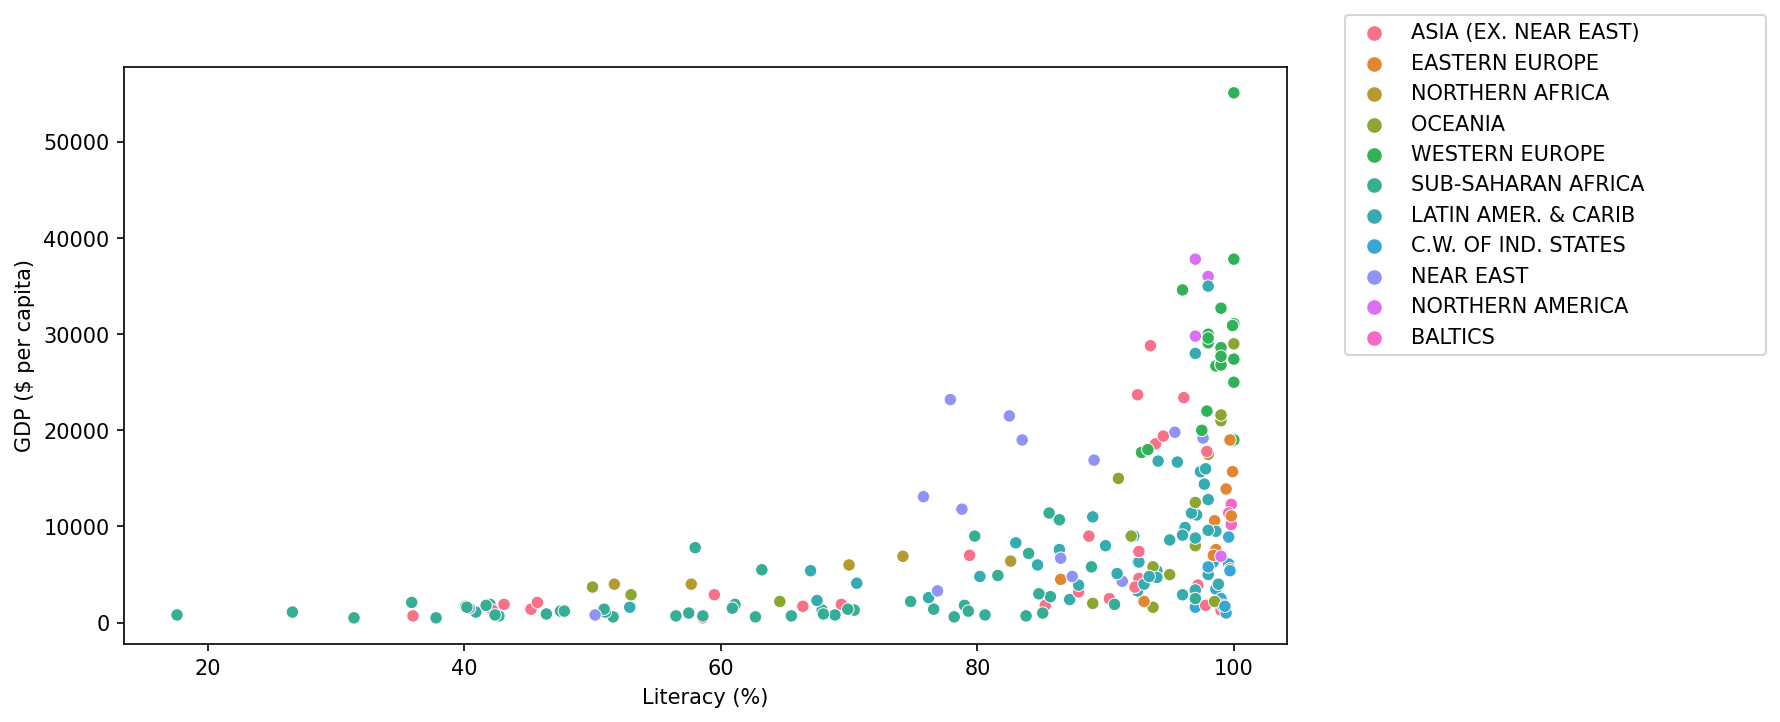

In [15]:
fig = plt.figure(figsize=(10,5), dpi=150)

sns.scatterplot(data=df_cia, x='Literacy (%)', y='GDP ($ per capita)', hue='Region')
plt.legend(loc=(1.05,0.5))

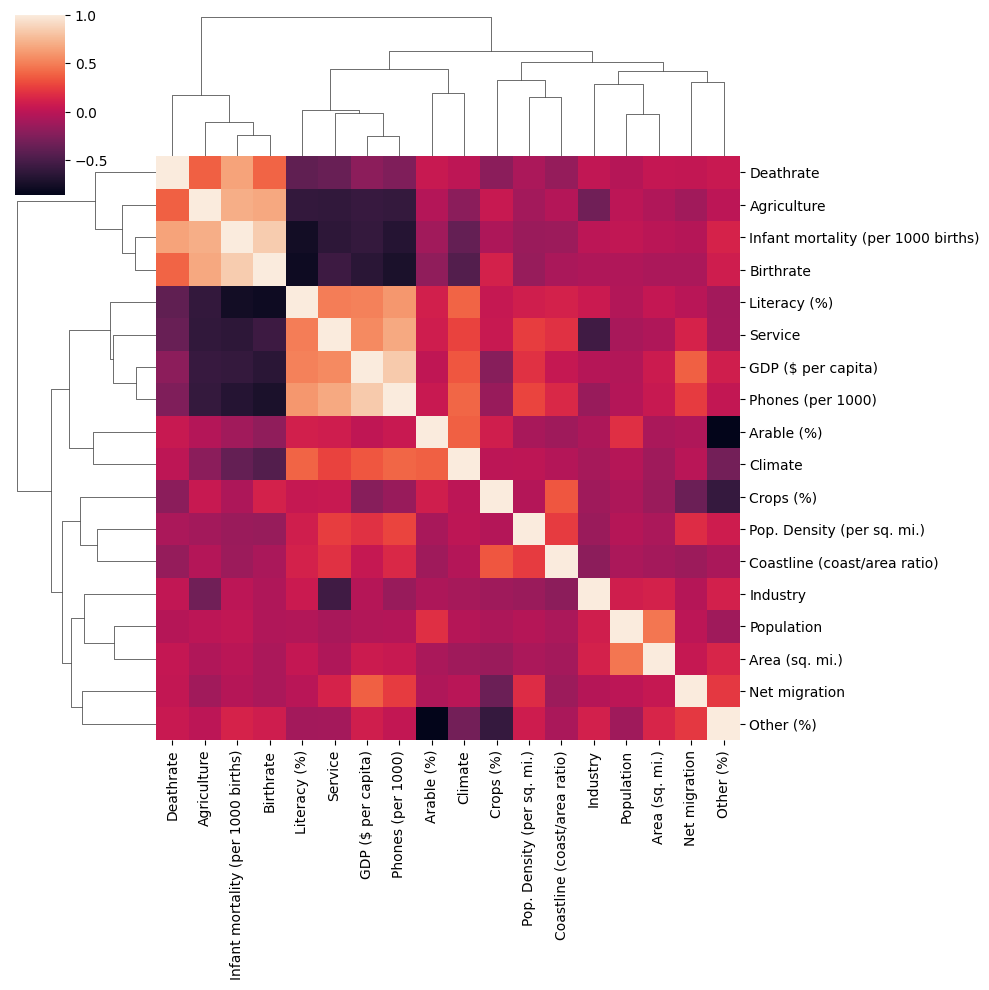

In [16]:
df_corr = df_cia.drop(columns=['Country', 'Region'], axis = 1)

sns.clustermap(df_corr.corr())

# Data Preprocessing

In [17]:
# number if missing values in each column
df_cia.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [18]:
df_cia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [19]:
specific_countries_areas = df_cia.loc[df_cia['Agriculture'].isnull(), ['Country', 'Area (sq. mi.)']]
specific_countries_areas

,Country,Area (sq. mi.)
3,American Samoa,199
4,Andorra,468
78,Gibraltar,7
80,Greenland,2166086
83,Guam,541
134,Mayotte,374
140,Montserrat,102
144,Nauru,21
153,N. Mariana Islands,477
171,Saint Helena,413


In [20]:
df_cia['Area (sq. mi.)'].max()

17075200

### As we can see, most of these countries have very little land area except Greenland and Western Sahara. Since they are tiny, they can be ignored for the analysis. Let's put 0 in their NaN values in the dataset.

In [21]:
df_cia[df_cia['Agriculture'].isnull()] = df_cia[df_cia['Agriculture'].isnull()].fillna(0)

In [22]:
df_cia.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

### We still have some missing values, mostly in the Literacy (%) and Climate column. Let's implement a pipeline to streamline our rest data processing.

In [23]:
X = df_cia.drop(columns=['Country'])
X

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.0,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400
224,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [24]:
# Index of the columns with NaN values
null_counts = X.isnull().sum()

for idx, (column, null_count) in enumerate(zip(null_counts.index, null_counts)):
    print(f"Column Index {idx}: {column} - Null Count: {null_count}")


Column Index 0: Region - Null Count: 0
Column Index 1: Population - Null Count: 0
Column Index 2: Area (sq. mi.) - Null Count: 0
Column Index 3: Pop. Density (per sq. mi.) - Null Count: 0
Column Index 4: Coastline (coast/area ratio) - Null Count: 0
Column Index 5: Net migration - Null Count: 1
Column Index 6: Infant mortality (per 1000 births) - Null Count: 1
Column Index 7: GDP ($ per capita) - Null Count: 0
Column Index 8: Literacy (%) - Null Count: 13
Column Index 9: Phones (per 1000) - Null Count: 2
Column Index 10: Arable (%) - Null Count: 1
Column Index 11: Crops (%) - Null Count: 1
Column Index 12: Other (%) - Null Count: 1
Column Index 13: Climate - Null Count: 18
Column Index 14: Birthrate - Null Count: 1
Column Index 15: Deathrate - Null Count: 2
Column Index 16: Agriculture - Null Count: 0
Column Index 17: Industry - Null Count: 1
Column Index 18: Service - Null Count: 1


In [28]:
trf1 = ColumnTransformer([
    ('impute_', SimpleImputer(strategy='mean'), [5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('Region_ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), [0])
], remainder='passthrough')

trf3 = ColumnTransformer([
    ('scaler', StandardScaler(), slice(0, 29))  # Include all columns up to 29
])


In [29]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3)
])

pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_', SimpleImputer(),
                                                  [5, 6, 8, 9, 10, 11, 12, 13,
                                                   14, 15, 17, 18])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Region_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  slice(0, 29, None))]))])

In [30]:
X_arr = pipe.fit_transform(X)
X_arr.shape

C:\Users\tfahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(227, 29)

### Creating and Fitting Kmeans Model

In [31]:
ssd = [] #sum of squared distances, also called distortion 

for k in range(2,30):
    model = KMeans(n_clusters=k)

    model.fit(X_arr)

    ssd.append(model.inertia_)

C:\Users\tfahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tfahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tfahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tfahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Text(0, 0.5, 'Sum of Squared Distances')

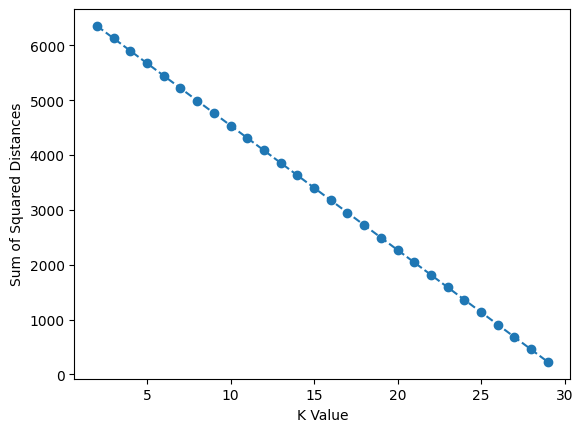

In [32]:
plt.plot(range(2,30),ssd,'o--')

plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

In [ ]:
ssd